In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from os.path import exists
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.models import load_model
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv('/content/winequality-red.csv', sep= ",")
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Checking for missing values
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

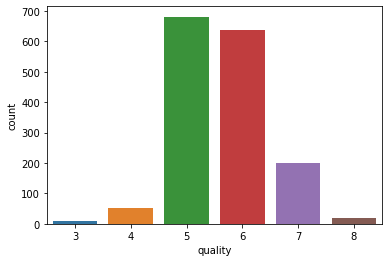

In [ ]:
j = sns.countplot(x="quality", data=red_wine)
plt.show(j)

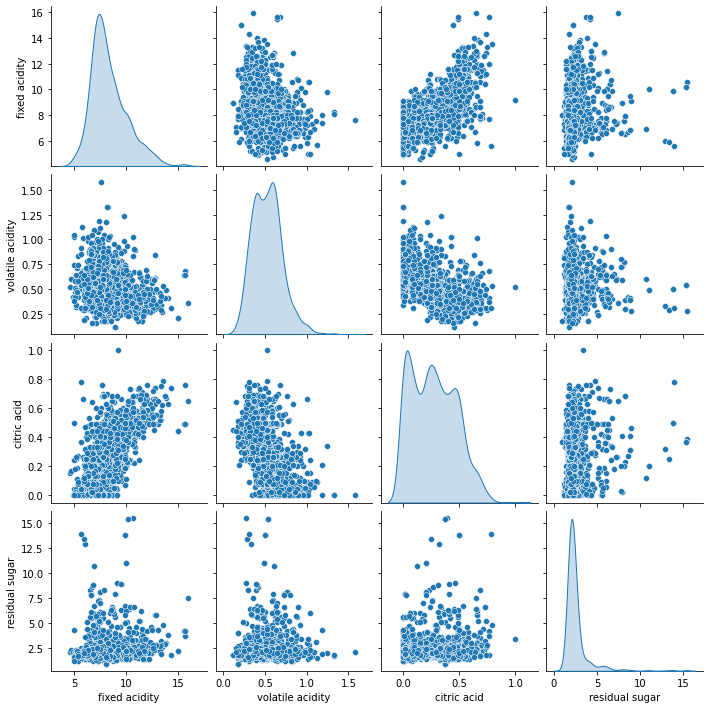

In [ ]:
sns.pairplot(red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']], diag_kind='kde')

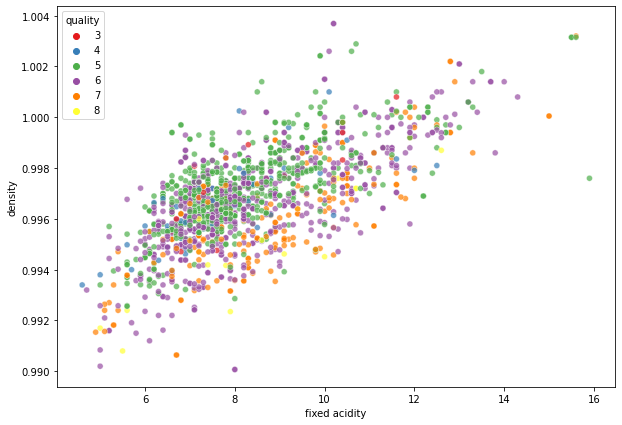

In [ ]:
plt.figure(figsize = (10 , 7))
sb.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = red_wine, alpha = 0.7, palette = "Set1")

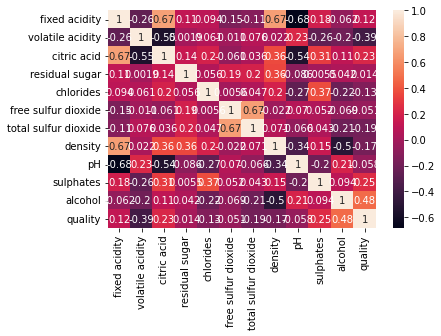

In [ ]:
cor = red_wine[red_wine.columns].corr()
correl_image=sns.heatmap(cor,annot=True)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(red_wine.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [ ]:
model = RandomForestRegressor(random_state=1, max_depth=12)
x = red_wine.drop(['quality'] , axis = 1)
#get_dummies is equivalent to one hot encoding
wd = pd.get_dummies(red_wine) 
model.fit(x, red_wine.quality)
display(model.feature_importances_)

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

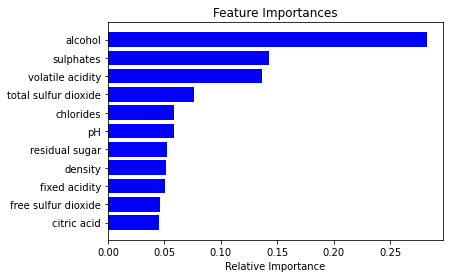

In [ ]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
del x['fixed acidity']
del x['free sulfur dioxide']
del x['citric acid']

In [ ]:
strategy = {0:1700, 1:1700, 2:1700, 3:1700, 4:1700, 5:1700}
oversample = SMOTE(sampling_strategy=strategy)
x, y = oversample.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1700) in class 0 will be larger than the number of samples in the majority class (class #2 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1700) in class 1 will be larger than the number of samples in the majority class (class #2 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1700) in class 2 will be larger than the number of samples in the majority class (class #2 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of sa

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)
print(y_train)

      0
5623  2
7557  4
7468  4
1061  5
4612  1
...  ..
361   3
639   3
3413  1
8387  4
1915  0

[8160 rows x 1 columns]


In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)
y_total_cat = tf.keras.utils.to_categorical(y, 6)

In [ ]:
#Scaling features
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# load pre-trained ensemble members
n_members = 15
hist_acc_df = pd.DataFrame()
hist_valacc_df = pd.DataFrame()
epochsNum = 150
for i in range(n_members):
  # load previously made model data
  filename = '/content/models/model_' + str(i + 1) + '.h5'
  if exists(filename):
    # pulls previous values from csvs and places them in their respective databases
    hist_acc_df['Model '+str(i+1)] = pd.read_csv('/content/history/history_model_acc.csv',usecols=[i+1])
    hist_valacc_df['Model '+str(i+1)] = pd.read_csv('/content/history/history_model_valacc.csv',usecols=[i+1])
    print('Loaded Data: %s' % filename)
  else:
    # define and fit model
    model = tf.keras.models.Sequential(layers = None , name = None)
    model.add(tf.keras.layers.Input(shape = 8))
    model.add(tf.keras.layers.Dense(units = 16+(2*i), activation = "relu" ))
    model.add(tf.keras.layers.Dense(units = 8+(2*i), activation = "relu" ))
    model.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
    # compile, gather history, and store model in memory as ensemble member
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics=['accuracy'])
    history = model.fit(x_train, y_train_cat,  batch_size=32, epochs=epochsNum, validation_data = (x_test,y_test_cat))
    model.save(filename)
    # save histories to pandas database
    hist_acc_df['Model '+str(i+1)] = history.history['accuracy']
    hist_valacc_df['Model '+str(i+1)] = history.history['val_accuracy']
    print('Saved: %s' % filename)

    #model.add(tf.keras.layers.GaussianNoise(1, seed=1))

Loaded Data: /content/models/model_1.h5
Loaded Data: /content/models/model_2.h5
Loaded Data: /content/models/model_3.h5
Loaded Data: /content/models/model_4.h5
Loaded Data: /content/models/model_5.h5
Loaded Data: /content/models/model_6.h5
Loaded Data: /content/models/model_7.h5
Loaded Data: /content/models/model_8.h5
Loaded Data: /content/models/model_9.h5
Loaded Data: /content/models/model_10.h5
Loaded Data: /content/models/model_11.h5
Loaded Data: /content/models/model_12.h5
Loaded Data: /content/models/model_13.h5
Loaded Data: /content/models/model_14.h5
Loaded Data: /content/models/model_15.h5


In [ ]:
hist_acc = '/content/history/history_model_acc.csv'
with open(hist_acc, mode='w') as f:
  hist_acc_df.to_csv(f)

hist_val_acc = '/content/history/history_model_valacc.csv'
with open(hist_val_acc, mode='w') as f:
  hist_valacc_df.to_csv(f)

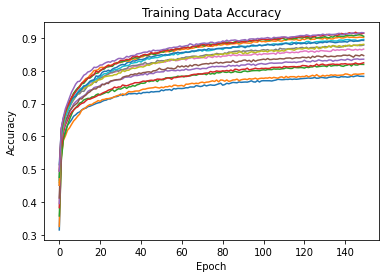

In [ ]:
for i in range(n_members):
  xVal = range(0,epochsNum)
  yVal = pd.read_csv('/content/history/history_model_acc.csv',usecols=[i+1])
  labelName = 'Model  ' + str(i+1)
  plt.plot(xVal, yVal, label=labelName)

#plt.legend()
plt.title('Training Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

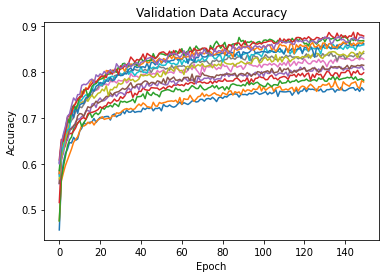

In [ ]:
 for i in range(n_members):
  xVal = range(0,epochsNum)
  yVal = pd.read_csv('/content/history/history_model_valacc.csv',usecols=[i+1])
  labelName = 'Model ' + str(i+1)
  plt.plot(xVal, yVal, label=labelName)
  
#plt.legend()
plt.title('Validation Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Text(0.5, 0, 'Epoch')

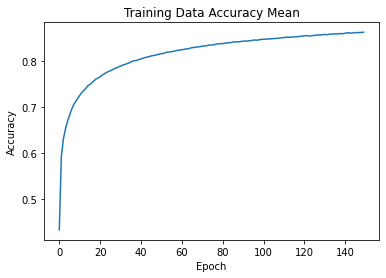

In [ ]:
xVal = range(0,epochsNum)
yVal = hist_acc_df.mean(axis=1)
plt.plot(xVal, yVal)
plt.title('Training Data Accuracy Mean')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

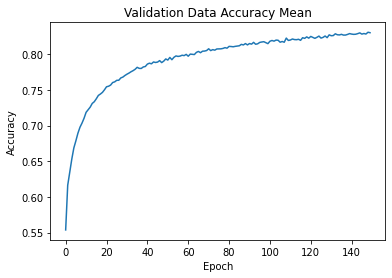

In [ ]:
xVal = range(0,epochsNum)
yVal = hist_valacc_df.mean(axis=1)
plt.plot(xVal, yVal)
plt.title('Validation Data Accuracy Mean')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

_,y_total_arg = np.nonzero(y_total_cat)
print(y_total_arg)

for i in range(n_members):
  filename = '/content/models/model_' + str(i + 1) + '.h5'
  reconstructed_model = keras.models.load_model(filename)
  _,predictions = np.nonzero(reconstructed_model.predict(x))
  print(predictions)
  print(accuracy_score(y_total_arg,predictions,normalize=True))
  print(classification_report(y_total_arg,predictions,zero_division=1))


[2 2 2 ... 5 5 5]
[2 2 2 ... 3 3 2]
0.17166666666666666
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1700
           1       1.00      0.00      0.00      1700
           2       0.21      0.88      0.34      1700
           3       0.08      0.15      0.11      1700
           4       1.00      0.00      0.00      1700
           5       1.00      0.00      0.00      1700

    accuracy                           0.17     10200
   macro avg       0.72      0.17      0.07     10200
weighted avg       0.72      0.17      0.07     10200

[2 2 2 ... 4 4 4]
0.19088235294117648
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1700
           1       0.03      0.00      0.00      1700
           2       0.21      0.81      0.34      1700
           3       1.00      0.00      0.00      1700
           4       0.16      0.34      0.21      1700
           5       1.00      0.00     

  #y_pred = tf.keras.utils.to_categorical(predictions,6)
  #y_pred_df.append(y_pred)
  #reshaped_y_pred_df = np.reshape(y_pred_df.shape[0], y_pred_df.shape[1])
